___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***.

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com), contains many features of different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method.

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

In [916]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


## 1. Import Modules, Load Data and Data Review

In [917]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, root_mean_squared_error
from sklearn.model_selection import train_test_split


from scipy.stats import skew

from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)

In [918]:
df0 = pd.read_csv('Ready_to_ML.csv')
df = df0.copy()

In [919]:
df.head().T

,0,1,2,3,4
make_model,Mercedes-Benz A 160,Mercedes-Benz EQE 350,Mercedes-Benz A 45 AMG,Mercedes-Benz A 35 AMG,Mercedes-Benz A 45 AMG
make,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz
location,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...","APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES","PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...","Carrer de Provença, 31 Local, 8029 BARCELONA, ES","CARRIL ARAGONES 4, 30007 CASILLAS, ES"
price,16950.0,80900.0,69900.0,46990.0,16800.0
body_type,Compact,Compact,Compact,Compact,Compact
type,Used,Pre-registered,Used,Used,Used
warranty,Yes,Yes,Yes,Yes,Yes
mileage,120200.0,5000.0,18900.0,18995.0,197000.0
gearbox,Manual,Automatic,Automatic,Automatic,Automatic
fuel_type,Diesel,Electric,Benzine,Benzine,Diesel


In [920]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26711 entries, 0 to 26710
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   make_model                     26711 non-null  object 
 1   make                           26711 non-null  object 
 2   location                       26711 non-null  object 
 3   price                          26711 non-null  float64
 4   body_type                      26711 non-null  object 
 5   type                           26711 non-null  object 
 6   warranty                       26711 non-null  object 
 7   mileage                        26711 non-null  float64
 8   gearbox                        26711 non-null  object 
 9   fuel_type                      26711 non-null  object 
 10  seller                         26711 non-null  object 
 11  engine_size                    26711 non-null  float64
 12  gears                          26711 non-null 

In [921]:
df.duplicated().sum()

1815

In [922]:
df.drop_duplicates(inplace=True)

In [923]:
df.duplicated().sum()

0

In [924]:
df.describe()

,price,mileage,engine_size,gears,co_emissions,empty_weight,previous_owner,age,power_kW,cons_avg
count,24896.000000,24896.000000,24896.000000,24896.000000,24896.000000,24896.000000,24896.000000,24896.000000,24896.000000,24896.000000
mean,23267.093067,67626.156910,1698.132150,5.774582,129.384751,1409.004820,1.458507,5.128213,117.265284,5.540101
std,20929.617776,61708.674086,789.478406,1.407822,54.363831,299.565866,0.849019,4.607968,66.075700,2.226174
min,490.000000,0.000000,0.000000,1.000000,0.000000,347.000000,1.000000,0.000000,33.000000,0.000000
25%,12480.000000,19000.000000,1242.000000,5.000000,106.000000,1205.000000,1.000000,2.000000,77.000000,4.300000
50%,17990.000000,52862.500000,1580.000000,6.000000,123.000000,1365.000000,1.000000,4.000000,97.000000,5.100000
75%,27900.000000,99532.250000,1969.000000,6.000000,150.000000,1575.000000,2.000000,7.000000,132.000000,6.400000
max,549000.000000,667128.000000,6300.000000,8.000000,399.000000,3150.000000,9.000000,20.000000,450.000000,18.300000


In [925]:
df.corr(numeric_only=True)

,price,mileage,engine_size,gears,co_emissions,empty_weight,previous_owner,age,power_kW,cons_avg
price,1.000000,-0.389668,0.452135,0.193783,0.241257,0.580873,-0.181174,-0.394801,0.708968,0.251454
mileage,-0.389668,1.000000,0.129491,-0.025685,0.170655,0.004025,0.368222,0.731396,-0.095839,0.139659
engine_size,0.452135,0.129491,1.000000,0.249758,0.672491,0.559162,0.083194,0.194488,0.770654,0.671041
gears,0.193783,-0.025685,0.249758,1.000000,0.239586,0.290264,-0.048624,-0.090815,0.272957,0.174519
co_emissions,0.241257,0.170655,0.672491,0.239586,1.000000,0.326153,0.118931,0.317986,0.524973,0.812006
empty_weight,0.580873,0.004025,0.559162,0.290264,0.326153,1.000000,-0.049365,-0.073288,0.665614,0.299871
previous_owner,-0.181174,0.368222,0.083194,-0.048624,0.118931,-0.049365,1.000000,0.469071,-0.013652,0.139314
age,-0.394801,0.731396,0.194488,-0.090815,0.317986,-0.073288,0.469071,1.000000,-0.048920,0.342378
power_kW,0.708968,-0.095839,0.770654,0.272957,0.524973,0.665614,-0.013652,-0.048920,1.000000,0.569033
cons_avg,0.251454,0.139659,0.671041,0.174519,0.812006,0.299871,0.139314,0.342378,0.569033,1.000000


In [926]:
make_model_count=df.make_model.value_counts()
make_model_count

make_model
Renault Megane              825
SEAT Leon                   757
Dacia Sandero               721
Hyundai i30                 699
Opel Astra                  634
Ford Mustang                572
Peugeot 308                 536
Nissan Qashqai              484
Ford Focus                  483
SEAT Ibiza                  433
Volvo V40                   430
Fiat Tipo                   415
Fiat 500                    413
Renault Clio                404
Ford Fiesta                 392
Nissan Micra                380
Fiat 500X                   373
Skoda Octavia               359
Opel Corsa                  358
Dacia Duster                343
Toyota Yaris                323
Opel Insignia               290
Volvo C70                   281
Peugeot 208                 260
Skoda Fabia                 246
Fiat 500C                   238
Toyota Auris                231
Peugeot RCZ                 220
Hyundai TUCSON              216
Peugeot 3008                215
Ford Kuga                   2

In [927]:
drop_model = make_model_count[make_model_count <= 100].index
drop_model

# We list the models with 100 or less observations.
# We will drop the observations of the models in this list from our data.

Index(['Hyundai i10', 'Peugeot 307', 'Fiat 124 Spider', 'Renault Twingo',
       'Fiat 500L', 'Opel Crossland X', 'Renault ZOE', 'Renault Laguna',
       'Mercedes-Benz A 200', 'Skoda Kamiq',
       ...
       'Mercedes-Benz ML 300', 'Dacia Break', 'Toyota Tundra',
       'Mercedes-Benz E 50 AMG', 'Mercedes-Benz CLS 300',
       'Mercedes-Benz S 65 AMG', 'Mercedes-Benz CLK 320', 'Toyota GR86',
       'Toyota Tacoma', 'Renault R 11'],
      dtype='object', name='make_model', length=420)

In [928]:
for i in drop_model:
    drop_index = df[df['make_model'] == i].index
    df.drop(index = drop_index, inplace=True)
    
df.reset_index(drop=True, inplace=True)

In [929]:
df

,make_model,make,location,price,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 180,Mercedes-Benz,"Bestel gemakkelijk Online 24/7, 1000 Brussel, BE",24400.0,Compact,Used,Yes,27150.0,Manual,Diesel,Dealer,1461.0,6.0,120.0,Front,"Alloy wheels, Automatically dimming interior m...",1330.0,No,Part/Full Leather,2.0,unefficient,2.0,85.0,4.5,Standard,Plus,Safety Premium Package
1,Mercedes-Benz A 180,Mercedes-Benz,"Zaackoer Weg 34, 15926 Luckau, DE",7450.0,Compact,Used,No,157500.0,Manual,Diesel,Dealer,1991.0,6.0,138.0,Front,"Alloy wheels, Automatically dimming interior m...",1295.0,Yes,Cloth,2.0,unefficient,12.0,80.0,5.2,Premium,Standard,Safety Premium Plus Package
2,Mercedes-Benz A 180,Mercedes-Benz,"Calle Carbón 19, 29603 MALAGA, ES",29800.0,Compact,Used,Yes,21734.0,Automatic,Diesel,Dealer,1461.0,7.0,99.5,Front,Sport seats,1445.0,No,Cloth,2.0,unefficient,2.0,85.0,3.9,Standard,Standard,Safety Premium Package
3,Mercedes-Benz A 180,Mercedes-Benz,"RUA REAL 60, 36860 PONTEAEREAS, ES",21000.0,Compact,Used,Yes,172700.0,Automatic,Diesel,Dealer,1461.0,7.0,99.5,Front,Sport seats,1425.0,No,Cloth,3.0,unefficient,4.0,80.0,3.7,Standard,Standard,Safety Standard Package
4,Mercedes-Benz A 180,Mercedes-Benz,"Canal de Sant Jordi nº17 Pol. Ind. Son oms, 0...",26800.0,Compact,Used,Yes,18989.0,Automatic,Diesel,Dealer,1461.0,7.0,99.5,Front,Sport seats,1455.0,No,Cloth,2.0,unefficient,2.0,85.0,3.9,Standard,Standard,Safety Premium Package
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18192,Volvo V40,Volvo,"1000 Brussel, BE",13000.0,Sedan,Used,No,114000.0,Manual,Diesel,Private seller,1969.0,6.0,94.0,Front,"All season tyres, Ambient lighting, Cargo barr...",1532.0,Yes,Cloth,1.0,efficient,4.0,88.0,3.6,Standard,Standard,Safety Premium Package
18193,Volvo S60,Volvo,"CALLE CATALUNYA, 37, 8520 LLERONA, ES",4999.0,Sedan,Used,Yes,166512.0,Manual,Benzine,Dealer,2521.0,5.0,145.0,Front,Alloy wheels,1550.0,No,Part/Full Leather,3.0,efficient,18.0,154.0,9.1,Standard,Standard,Safety Premium Package
18194,Volvo S90,Volvo,"HERMANOS LUMIERE Nº16, 29004 MALAGA, ES",37600.0,Sedan,Used,Yes,40345.0,Automatic,Diesel,Dealer,1969.0,8.0,127.0,4WD,Alloy wheels,2077.0,No,Part/Full Leather,2.0,efficient,3.0,288.0,2.0,Standard,Standard,Safety Premium Plus Package
18195,Volvo C30,Volvo,"Sur rendez-vous, 5060 Sambreville, BE",7300.0,Sedan,Used,Yes,96000.0,Manual,Diesel,Dealer,1560.0,6.0,99.0,Front,"Alloy wheels, Automatically dimming interior m...",1356.0,Yes,Cloth,1.0,unefficient,11.0,84.0,3.8,Standard,Standard,Safety Premium Package


## Feature Engineering

- Focus on the "Extras" column
- Think how a categorical feature can be converted into ordinal.

### Converting the Extras feature from object to numeric

In [930]:
df["extras"]

0        Alloy wheels, Automatically dimming interior m...
1        Alloy wheels, Automatically dimming interior m...
2                                              Sport seats
3                                              Sport seats
4                                              Sport seats
                               ...                        
18192    All season tyres, Ambient lighting, Cargo barr...
18193                                         Alloy wheels
18194                                         Alloy wheels
18195    Alloy wheels, Automatically dimming interior m...
18196    Alloy wheels (18"), Automatically dimming inte...
Name: extras, Length: 18197, dtype: object

In [931]:
df.extras.str.count(",").add(1)

0        5
1        6
2        1
3        1
4        1
        ..
18192    9
18193    1
18194    1
18195    3
18196    2
Name: extras, Length: 18197, dtype: int64

In [932]:
df["extras"].apply(lambda x: x.count(",")).add(1)

0        5
1        6
2        1
3        1
4        1
        ..
18192    9
18193    1
18194    1
18195    3
18196    2
Name: extras, Length: 18197, dtype: int64

# Converting the Extras feature from object to numeric

In [933]:
df["extras"] = df["extras"].apply(lambda x: x.count(",")).add(1)

In [934]:
df.head()

,make_model,make,location,price,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 180,Mercedes-Benz,"Bestel gemakkelijk Online 24/7, 1000 Brussel, BE",24400.0,Compact,Used,Yes,27150.0,Manual,Diesel,Dealer,1461.0,6.0,120.0,Front,5,1330.0,No,Part/Full Leather,2.0,unefficient,2.0,85.0,4.5,Standard,Plus,Safety Premium Package
1,Mercedes-Benz A 180,Mercedes-Benz,"Zaackoer Weg 34, 15926 Luckau, DE",7450.0,Compact,Used,No,157500.0,Manual,Diesel,Dealer,1991.0,6.0,138.0,Front,6,1295.0,Yes,Cloth,2.0,unefficient,12.0,80.0,5.2,Premium,Standard,Safety Premium Plus Package
2,Mercedes-Benz A 180,Mercedes-Benz,"Calle Carbón 19, 29603 MALAGA, ES",29800.0,Compact,Used,Yes,21734.0,Automatic,Diesel,Dealer,1461.0,7.0,99.5,Front,1,1445.0,No,Cloth,2.0,unefficient,2.0,85.0,3.9,Standard,Standard,Safety Premium Package
3,Mercedes-Benz A 180,Mercedes-Benz,"RUA REAL 60, 36860 PONTEAEREAS, ES",21000.0,Compact,Used,Yes,172700.0,Automatic,Diesel,Dealer,1461.0,7.0,99.5,Front,1,1425.0,No,Cloth,3.0,unefficient,4.0,80.0,3.7,Standard,Standard,Safety Standard Package
4,Mercedes-Benz A 180,Mercedes-Benz,"Canal de Sant Jordi nº17 Pol. Ind. Son oms, 0...",26800.0,Compact,Used,Yes,18989.0,Automatic,Diesel,Dealer,1461.0,7.0,99.5,Front,1,1455.0,No,Cloth,2.0,unefficient,2.0,85.0,3.9,Standard,Standard,Safety Premium Package


In [935]:
df.drop(columns=["make", "location"], inplace=True)

# make_model feature already gives us insight about make feature so we drop make feature.
# We are dropping the location feature because we don't think it will have an effect on prices.

## multicollinearity control

In [936]:
def color_red(val):

    if (val > 0.90 and val < 1) or (val < -0.90 and val > -1):
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'

# This function will return the correlation between independent features coloured based on their correlation strength.
# If the correlation is between (-0.90, +0.90), the value will be coloured red, otherwise black.

# Linear models (linear regression, ridge, lasso, elasticnet, logistic regression) are badly affected by multicollinearity.
# Regularisation models handle this problem gracefully as well as the overfitting situation.

In [937]:
df.corr(numeric_only=True).style.applymap(color_red)

,price,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
price,1.000000,-0.512806,0.472763,0.298219,0.154896,0.326470,0.588013,-0.256245,-0.525858,0.687179,0.164896
mileage,-0.512806,1.000000,0.096988,-0.075386,0.142708,-0.176425,0.011683,0.359637,0.742675,-0.096395,0.111174
engine_size,0.472763,0.096988,1.000000,0.104819,0.623381,0.150075,0.570256,0.062210,0.179708,0.804989,0.627165
gears,0.298219,-0.075386,0.104819,1.000000,0.105622,0.188638,0.375265,-0.069685,-0.127089,0.274800,0.082923
co_emissions,0.154896,0.142708,0.623381,0.105622,1.000000,0.066954,0.305501,0.116515,0.331054,0.515299,0.804786
extras,0.326470,-0.176425,0.150075,0.188638,0.066954,1.000000,0.323238,-0.092745,-0.181164,0.282883,0.087471
empty_weight,0.588013,0.011683,0.570256,0.375265,0.305501,0.323238,1.000000,-0.037641,-0.036816,0.676901,0.265832
previous_owner,-0.256245,0.359637,0.062210,-0.069685,0.116515,-0.092745,-0.037641,1.000000,0.446526,-0.021639,0.117748
age,-0.525858,0.742675,0.179708,-0.127089,0.331054,-0.181164,-0.036816,0.446526,1.000000,-0.032599,0.336580
power_kW,0.687179,-0.096395,0.804989,0.274800,0.515299,0.282883,0.676901,-0.021639,-0.032599,1.000000,0.553695


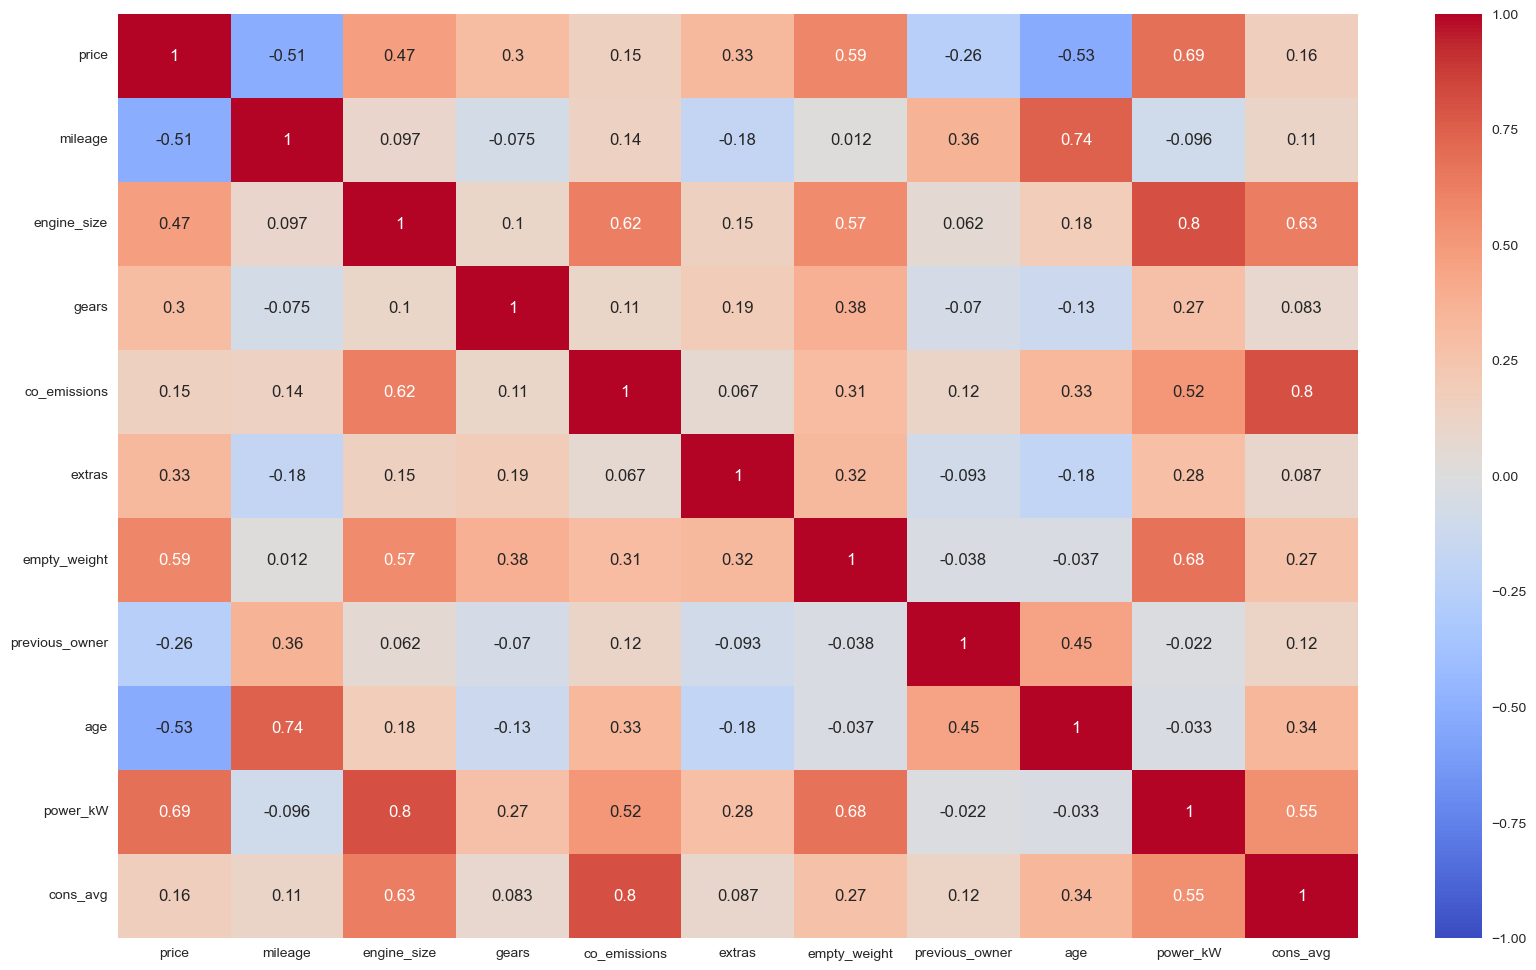

In [938]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show();

In [939]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [940]:
df_predictors = df.drop(columns=['price','make_model','body_type','type','warranty','gearbox','fuel_type','seller','drivetrain','full_service_history','upholstery','energy_efficiency_class','comfort_&_convenience_Package','entertainment_&_media_Package','safety_&_security_Package'])
predictors = df_predictors.columns

In [941]:
predictors

Index(['mileage', 'engine_size', 'gears', 'co_emissions', 'extras',
       'empty_weight', 'previous_owner', 'age', 'power_kW', 'cons_avg'],
      dtype='object')

In [942]:
vif_data = pd.DataFrame()
vif_data['Variable'] = predictors

In [943]:
# Calculate VIF scores for each predictor
vif_data["VIF"] = [variance_inflation_factor(df[predictors].values, i) for i in range(len(predictors))]

In [944]:
vif_data
# check the VIF scores:
# 1   -> no correlation
# 1-5 -> ok
# >5  -> Alert! Be cautious and inspect more. Consider removing.
# >10 -> Severe multicolliniearity!!!

,Variable,VIF
0,mileage,5.471118
1,engine_size,25.196104
2,gears,21.675253
3,co_emissions,23.504770
4,extras,2.780753
5,empty_weight,38.757802
6,previous_owner,4.798746
7,age,6.879670
8,power_kW,17.867896
9,cons_avg,24.705654


## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

### Train | Test Split

In [945]:
X = df.drop(columns="price", axis=1)
y = df["price"]

In [946]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [947]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (12737, 24)
Train target shape   :  (12737,)
Test features shape  :  (5460, 24)
Test target shape    :  (5460,)


# OneHotEncoder and OrdinalEncoder

# Converting Object Features into Numerical Features Using Make Column Transformer with OrdinalEncoder and OneHotEncoder

In [948]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer

In [949]:
df.select_dtypes(include="object").head(1)

,make_model,body_type,type,warranty,gearbox,fuel_type,seller,drivetrain,full_service_history,upholstery,energy_efficiency_class,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 180,Compact,Used,Yes,Manual,Diesel,Dealer,Front,No,Part/Full Leather,unefficient,Standard,Plus,Safety Premium Package


In [950]:
cat_onehot  = ['make_model', 'body_type', 'gearbox', 'fuel_type', 'drivetrain']

cat_ordinal = ['type', 'warranty', 'seller', 'full_service_history', 'upholstery', 'energy_efficiency_class', 'comfort_&_convenience_Package',
               'entertainment_&_media_Package', 'safety_&_security_Package']
    
cat_for_type=["Used", "Employee's car", "Demonstration", "Pre-registered"]
cat_for_warranty=["No", "Yes"]
cat_for_seller=['Dealer', 'Private seller']
cat_for_service_history=["No", "Yes"]
cat_for_upholstery=['Cloth','Part/Full Leather']
cat_for_energy=['unefficient', 'efficient']
cat_for_comfort=['Standard', 'Premium', 'Premium Plus']
cat_for_ent=['Standard', 'Plus']
cat_for_safety=['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package']

# We specify the features we will convert to onohotencoder in the cat_onehot list,
# and the features that we will convert to ordinalencoder in the cat_ordinal list.

# Since the model does not know in which order the features we will transform will be numbered,
# we give this order to the model manually.

In [951]:
column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", 
                                       sparse_output=False), cat_onehot), 
                        (OrdinalEncoder(handle_unknown="use_encoded_value",
                                        unknown_value=-1,
                                        categories=[cat_for_type, 
                                                    cat_for_warranty,
                                                    cat_for_seller,
                                                    cat_for_service_history,
                                                    cat_for_upholstery,
                                                    cat_for_energy,
                                                    cat_for_comfort, 
                                                    cat_for_ent, 
                                                    cat_for_safety]), cat_ordinal),
                         remainder='passthrough', 
                         verbose_feature_names_out=False) # MinMaxScaler()

column_trans=column_trans.set_output(transform="pandas")

In [952]:
X_train.head()

,make_model,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
11631,Toyota Auris,Station wagon,Used,Yes,61582.0,Automatic,Benzine,Dealer,1798.0,1.0,85.0,Front,1,1335.0,No,Cloth,3.0,efficient,7.0,100.0,3.7,Standard,Standard,Safety Premium Package
6817,SEAT Leon,Compact,Used,Yes,30000.0,Automatic,Benzine,Dealer,1984.0,7.0,124.0,Front,2,1431.0,No,Cloth,1.0,efficient,3.0,213.0,6.7,Standard,Standard,Safety Standard Package
14061,Ford Mustang,Convertible,Used,No,9000.0,Manual,Benzine,Private seller,2300.0,6.0,209.0,Rear,7,1799.0,No,Part/Full Leather,1.0,unefficient,1.0,213.0,9.2,Standard,Plus,Safety Premium Package
3465,Peugeot 308,Compact,Pre-registered,Yes,5.0,Manual,Benzine,Dealer,1199.0,6.0,129.0,Front,1,1254.0,No,Part/Full Leather,1.0,efficient,0.0,81.0,0.0,Standard,Standard,Safety Standard Package
16096,Hyundai i30,Station wagon,Used,Yes,62878.0,Manual,Diesel,Dealer,1582.0,6.0,112.0,Front,1,1310.0,No,Cloth,1.0,unefficient,4.0,81.0,3.8,Standard,Standard,Safety Premium Package


In [953]:
X_test.head()

,make_model,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
15071,Ford Focus,Sedan,Used,Yes,27532.0,Manual,Diesel,Dealer,1500.0,6.0,109.0,Front,8,1280.0,No,Cloth,1.0,efficient,2.0,88.0,3.60,Premium,Plus,Safety Premium Package
10999,Toyota Aygo,Compact,Used,Yes,31167.0,Manual,Benzine,Dealer,998.0,5.0,93.0,Front,4,985.0,No,Cloth,1.0,efficient,2.0,53.0,4.00,Standard,Plus,Safety Premium Package
14000,Ford Mustang,Convertible,Used,No,33800.0,Automatic,Benzine,Private seller,5083.0,6.0,273.0,Rear,9,1893.0,Yes,Part/Full Leather,1.0,unefficient,4.0,310.0,12.50,Standard,Plus,Safety Premium Package
15766,Hyundai TUCSON,Off-Road/Pick-up,Used,Yes,34850.0,Automatic,Diesel,Dealer,1600.0,6.0,129.0,Front,1,1425.0,No,Cloth,1.0,unefficient,4.0,100.0,4.65,Standard,Standard,Safety Premium Package
4291,Peugeot 3008,Off-Road/Pick-up,Used,No,57430.0,Automatic,Diesel,Dealer,1997.0,8.0,129.0,Front,15,1555.0,Yes,Part/Full Leather,1.0,efficient,3.0,132.0,4.90,Premium,Plus,Safety Premium Package


In [954]:
X_transformed = column_trans.fit_transform(X)
X_transformed

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Panda,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,make_model_Ford Kuga,make_model_Ford Mondeo,make_model_Ford Mustang,make_model_Hyundai IONIQ,make_model_Hyundai TUCSON,make_model_Hyundai i20,make_model_Hyundai i30,make_model_Mercedes-Benz A 180,make_model_Nissan 350Z,make_model_Nissan 370Z,make_model_Nissan Juke,make_model_Nissan Micra,make_model_Nissan Pulsar,make_model_Nissan Qashqai,make_model_Nissan X-Trail,make_model_Opel Adam,make_model_Opel Astra,make_model_Opel Cascada,make_model_Opel Corsa,make_model_Opel Grandland X,make_model_Opel Insignia,make_model_Peugeot 2008,make_model_Peugeot 206,make_model_Peugeot 207,make_model_Peugeot 208,make_model_Peugeot 3008,make_model_Peugeot 308,make_model_Peugeot 508,make_model_Peugeot RCZ,make_model_Renault Captur,make_model_Renault Clio,make_model_Renault Kadjar,make_model_Renault Megane,make_model_Renault Talisman,make_model_SEAT Arona,make_model_SEAT Ateca,make_model_SEAT Ibiza,make_model_SEAT Leon,make_model_Skoda Fabia,make_model_Skoda Karoq,make_model_Skoda Kodiaq,make_model_Skoda Octavia,make_model_Skoda Scala,make_model_Skoda Superb,make_model_Toyota Auris,make_model_Toyota Aygo,make_model_Toyota C-HR,make_model_Toyota Corolla,make_model_Toyota RAV 4,make_model_Toyota Yaris,make_model_Volvo C30,make_model_Volvo C70,make_model_Volvo S60,make_model_Volvo S90,make_model_Volvo V40,make_model_Volvo V60,make_model_Volvo V90,make_model_Volvo XC40,make_model_Volvo XC60,make_model_Volvo XC90,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road/Pick-up,body_type_Sedan,body_type_Station wagon,gearbox_Automatic,gearbox_Manual,gearbox_Semi-automatic,fuel_type_Benzine,fuel_type_Diesel,fuel_type_Electric,fuel_type_Liquid/Natural Gas,drivetrain_4WD,drivetrain_Front,drivetrain_Rear,type,warranty,seller,full_service_history,upholstery,energy_efficiency_class,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,27150.0,1461.0,6.0,120.0,5,1330.0,2.0,2.0,85.0,4.5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,157500.0,1991.0,6.0,138.0,6,1295.0,2.0,12.0,80.0,5.2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,21734.0,1461.0,7.0,99.5,1,1445.0,2.0,2.0,85.0,3.9
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,172700.0,1461.0,7.0,99.5,1,1425.0,3.0,4.0,80.0,3.7
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

# Scaling

In [955]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [956]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_transformed)

# DataFrame'e dönüştürme (isteğe bağlı)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_transformed.columns)
X_scaled_df

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Panda,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,make_model_Ford Kuga,make_model_Ford Mondeo,make_model_Ford Mustang,make_model_Hyundai IONIQ,make_model_Hyundai TUCSON,make_model_Hyundai i20,make_model_Hyundai i30,make_model_Mercedes-Benz A 180,make_model_Nissan 350Z,make_model_Nissan 370Z,make_model_Nissan Juke,make_model_Nissan Micra,make_model_Nissan Pulsar,make_model_Nissan Qashqai,make_model_Nissan X-Trail,make_model_Opel Adam,make_model_Opel Astra,make_model_Opel Cascada,make_model_Opel Corsa,make_model_Opel Grandland X,make_model_Opel Insignia,make_model_Peugeot 2008,make_model_Peugeot 206,make_model_Peugeot 207,make_model_Peugeot 208,make_model_Peugeot 3008,make_model_Peugeot 308,make_model_Peugeot 508,make_model_Peugeot RCZ,make_model_Renault Captur,make_model_Renault Clio,make_model_Renault Kadjar,make_model_Renault Megane,make_model_Renault Talisman,make_model_SEAT Arona,make_model_SEAT Ateca,make_model_SEAT Ibiza,make_model_SEAT Leon,make_model_Skoda Fabia,make_model_Skoda Karoq,make_model_Skoda Kodiaq,make_model_Skoda Octavia,make_model_Skoda Scala,make_model_Skoda Superb,make_model_Toyota Auris,make_model_Toyota Aygo,make_model_Toyota C-HR,make_model_Toyota Corolla,make_model_Toyota RAV 4,make_model_Toyota Yaris,make_model_Volvo C30,make_model_Volvo C70,make_model_Volvo S60,make_model_Volvo S90,make_model_Volvo V40,make_model_Volvo V60,make_model_Volvo V90,make_model_Volvo XC40,make_model_Volvo XC60,make_model_Volvo XC90,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road/Pick-up,body_type_Sedan,body_type_Station wagon,gearbox_Automatic,gearbox_Manual,gearbox_Semi-automatic,fuel_type_Benzine,fuel_type_Diesel,fuel_type_Electric,fuel_type_Liquid/Natural Gas,drivetrain_4WD,drivetrain_Front,drivetrain_Rear,type,warranty,seller,full_service_history,upholstery,energy_efficiency_class,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
0,-0.138605,-0.104616,-0.203117,-0.152391,-0.115119,-0.144661,-0.078341,-0.152768,-0.148379,-0.165126,-0.10753,-0.092386,-0.18015,-0.075449,-0.109602,-0.095071,-0.199869,12.122008,-0.081817,-0.092083,-0.074708,-0.146041,-0.077985,-0.165301,-0.082156,-0.079399,-0.189996,-0.083167,-0.141663,-0.086776,-0.127259,-0.088998,-0.083501,-0.088998,-0.120396,-0.109345,-0.174211,-0.103807,-0.110625,-0.092989,-0.150684,-0.084166,-0.217922,-0.087097,-0.09595,-0.100233,-0.156125,-0.208341,-0.117064,-0.088684,-0.089934,-0.141865,-0.102173,-0.102447,-0.113391,-0.082832,-0.089311,-0.10272,-0.076908,-0.134428,-0.082156,-0.125237,-0.082495,-0.077985,-0.155570,-0.092989,-0.075816,-0.076182,-0.103265,-0.077628,1.925656,-0.328868,-0.32743,-0.474576,-0.525099,-0.48938,-0.718797,0.721349,-0.039953,-1.388664,1.450232,-0.052491,-0.12947,-0.330303,0.412492,-0.222177,-0.343883,0.977986,-0.245073,-0.868777,1.210531,-1.368377,-0.692360,1.233737,0.138664,-0.656844,-0.241792,0.159751,-0.104883,0.202222,-0.130557,0.70253,-0.667486,-0.435283,-0.405404
1,-0.138605,-0.104616,-0.203117,-0.152391,-0.115119,-0.144661,-0.078341,-0.152768,-0.148379,-0.165126,-0.10753,-0.092386,-0.18015,-0.075449,-0.109602,-0.095071,-0.199869,12.122008,-0.081817,-0.092083,-0.074708,-0.146041,-0.077985,-0.165301,-0.082156,-0.079399,-0.189996,-0.083167,-0.141663,-0.086776,-0.127259,-0.088998,-0.083501,-0.088998,-0.120396,-0.109345,-0.174211,-0.103807,-0.110625,-0.092989,-0.150684,-0.084166,-0.217922,-0.087097,-0.09595,-0.100233,-0.156125,-0.208341,-0.117064,-0.088684,-0.089934,-0.141865,-0.102173,-0.102447,-0.113391,-0.082832,-0.089311,-0.10272,-0.076908,-0.134428,-0.082156,-0.125237,-0.082495,-0.077985,-0.155570,-0.092989,-0.075816,-0.076182,-0.103265,-0.077628,1.925656,-0.328868,-0.32743,-0.474576,-0.525099,-0.48938,-0.718797,

In [957]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [958]:
X = df.drop('price', axis=1)
y = df['price']

# Define which columns are numerical and which are categorical
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Create preprocessing pipelines for both numerical and categorical data
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply the preprocessing pipeline to the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

print(f'Preprocessed training features shape: {X_train_preprocessed.shape}')
print(f'Preprocessed test features shape: {X_test_preprocessed.shape}')

Preprocessed training features shape: (12737, 118)
Preprocessed test features shape: (5460, 118)


## 3. Implement Linear Regression

 - Import the modul
 - Fit the model
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics

*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [959]:
# Pre-defined functions

def train_val(model, X_train, y_train, X_test, y_test):
    """This function will help you get regression metrics on both train
    and test set provided.

    Args:
        model : model that is used for prediction
        X_train : Train features
        y_train : Train target
        X_test  : Test features
        y_test  : Test target

    Returns:
        Dataframe : Returns scores dataframe
    """

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},

    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}

    return pd.DataFrame(scores)

def adj_r2(y_test, y_pred, X):
    """This function gives adjusted R^2

    Args:
        y_test : Actual target
        y_pred : Predcition
        X : Features

    Returns:
        adj_r2: Adjusted R^2
    """
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2


In [960]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [961]:
lm.fit(X_train_preprocessed, y_train)

LinearRegression()

In [962]:
y_pred = lm.predict(X_test_preprocessed)
y_train_pred = lm.predict(X_train_preprocessed)

In [963]:
train_val(lm, X_train_preprocessed, y_train, X_test_preprocessed, y_test)

,train,test
R2,8.297930e-01,8.487086e-01
mae,2.806319e+03,2.788715e+03
mse,2.734464e+07,2.276309e+07
rmse,5.229210e+03,4.771068e+03


## Cross Validate

In [964]:
model = LinearRegression()
scores = cross_validate(model, X_train_preprocessed, y_train,
                        scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                    'neg_root_mean_squared_error', 'neg_mean_absolute_percentage_error'], cv = 10, return_train_score=True)


# Creating a brand new model for cross validation.

# Set return_train_score=True to get the train score results of cross validation as well.

In [965]:
scores
# The scores are returned as a dictionary.

{'fit_time': array([0.04990792, 0.04000139, 0.04141855, 0.04300165, 0.0409987 ,
        0.04400134, 0.03911567, 0.04300404, 0.0387826 , 0.03900075]),
 'score_time': array([0.00300002, 0.00199986, 0.00199986, 0.00199962, 0.00299978,
        0.00200009, 0.00199986, 0.00200152, 0.00199986, 0.0019989 ]),
 'test_r2': array([0.85294038, 0.83451429, 0.84425366, 0.83991202, 0.82925348,
        0.79189266, 0.84529043, 0.86099885, 0.78907815, 0.80483265]),
 'train_r2': array([0.82741501, 0.82914868, 0.828256  , 0.82863989, 0.82964104,
        0.83452985, 0.82802733, 0.82651161, 0.83529525, 0.8324864 ]),
 'test_neg_mean_absolute_error': array([-2713.87795771, -2886.25041859, -2748.40460817, -2850.98885067,
        -2842.41547549, -2970.90436782, -2773.5559207 , -2643.15186617,
        -3030.72238951, -2895.36741619]),
 'train_neg_mean_absolute_error': array([-2834.20707294, -2812.09815775, -2815.27337461, -2803.96444091,
        -2804.82004503, -2781.76552736, -2813.97128569, -2836.29821117,
    

In [966]:
pd.DataFrame(scores, index = range(1,11))
# To make it easier to read, we turn the returned dictionary into a dataframe.

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error
1,0.049908,0.003000,0.852940,0.827415,-2713.877958,-2834.207073,-1.965174e+07,-2.824371e+07,-4433.027982,-5314.480975,-0.199496,-0.199584
2,0.040001,0.002000,0.834514,0.829149,-2886.250419,-2812.098158,-2.436796e+07,-2.770243e+07,-4936.391179,-5263.309850,-0.213203,-0.196767
3,0.041419,0.002000,0.844254,0.828256,-2748.404608,-2815.273375,-2.250237e+07,-2.789778e+07,-4743.665781,-5281.834557,-0.197510,-0.198018
4,0.043002,0.002000,0.839912,0.828640,-2850.988851,-2803.964441,-2.311912e+07,-2.783903e+07,-4808.234613,-5276.270789,-0.202124,-0.197467
5,0.040999,0.003000,0.829253,0.829641,-2842.415475,-2804.820045,-3.146182e+07,-2.692109e+07,-5609.083669,-5188.553646,-0.197968,-0.197308
6,0.044001,0.002000,0.791893,0.834530,-2970.904368,-2781.765527,-3.855057e+07,-2.613071e+07,-6208.910557,-5111.820702,-0.208754,-0.195599
7,0.039116,0.002000,0.845290,0.828027,-2773.555921,-2813.971286,-2.378080e+07,-2.776088e+07,-4876.555662,-5268.859477,-0.195903,-0.197506
8,0.043004,0.002002,0.860999,0.826512,-2643.151866,-2836.298211,-2.004389e+07,-2.818192e+07,-4477.040524,-5308.664452,-0.194072,-0.198287
9,0.038783,0.002000,0.789078,0.835295,-3030.722390,-2763.613861,-4.258816e+07,-2.570170e+07,-6525.960319,-5069.684692,-0.200560,-0.195620
10,0.039001,0.001999,0.804833,0.832486,-2895.367416,-2790.471759,-3.249304e+07,-2.680035e+07,-5700.267063,-5176.905409,-0.186109,-0.198274


In [967]:
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()

# Return the mean of the metrics we got from cross validation.

test_r2                                     8.292967e-01
train_r2                                    8.299951e-01
test_neg_mean_absolute_error               -2.835564e+03
train_neg_mean_absolute_error              -2.805648e+03
test_neg_mean_squared_error                -2.785595e+07
train_neg_mean_squared_error               -2.731796e+07
test_neg_root_mean_squared_error           -5.231914e+03
train_neg_root_mean_squared_error          -5.226038e+03
test_neg_mean_absolute_percentage_error    -1.995700e-01
train_neg_mean_absolute_percentage_error   -1.974430e-01
dtype: float64

In [968]:

train_val(lm, X_train_preprocessed, y_train, X_test_preprocessed, y_test)

# Comparing train and test scores to diagnose overfitting/underfitting is not too bad of a method, but if we strictly take the test set as a reference to tune our model,
# we will end up overestimating the model performance in the most optimistic/ambitious way. Trying to diagnose overfitting/underfitting from CV results
# is the best way to go about it.

# Also, CV tells us much more about the consistency and reliability of the model as well as different parts of the dataset.

,train,test
R2,8.297930e-01,8.487086e-01
mae,2.806319e+03,2.788715e+03
mse,2.734464e+07,2.276309e+07
rmse,5.229210e+03,4.771068e+03


In [969]:
adj_r2(y_test, y_pred, X_test)

0.8480405623356769

In [970]:
lm.coef_

# We will assign the coefficients of each model to their own variables to compare
# how regularisation affects the coefficients later on.

array([-2.80651198e+03,  1.89450169e+03,  7.37153520e+01, -3.34850188e+02,
        1.34919414e+00,  2.82008033e+02, -7.09997079e+01, -3.52783785e+03,
        4.92184595e+03, -4.54267799e+02, -1.23274084e+03, -2.60915074e+03,
       -4.00172896e+03, -2.53635641e+03, -1.89409158e+02, -3.58734292e+02,
       -2.19199561e+03, -3.57164498e+03, -2.37423501e+03, -1.07051545e+03,
        5.27490424e+02, -3.97296876e+02, -3.36887032e+03, -7.76493900e+02,
        2.63548792e+03, -3.18836593e+03, -2.63030275e+03,  4.61156022e+03,
       -9.15049962e+03, -1.15060989e+04, -1.32197504e+03, -2.25374926e+03,
       -3.04896031e+03,  1.14852171e+03,  7.87546352e+02, -4.24409637e+03,
       -3.11792369e+03,  3.79307894e+01, -3.81892607e+03,  7.23825215e+02,
       -2.34409361e+03,  4.60102422e+02,  1.85030032e+03, -1.52714592e+03,
       -2.36078578e+03,  3.77173700e+03, -8.54598742e+02,  3.73549521e+03,
       -2.58903353e+03, -6.09406598e+02, -1.81254413e+03,  2.57757651e+02,
       -1.29280083e+03, -

In [971]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

,lm_coef
0,-2806.511978
1,1894.501685
2,73.715352
3,-334.850188
4,1.349194
5,282.008033
6,-70.999708
7,-3527.837846
8,4921.845953
9,-454.267799


## Prediction Error

In [972]:
model = LinearRegression()
visualizer = PredictionError(model)

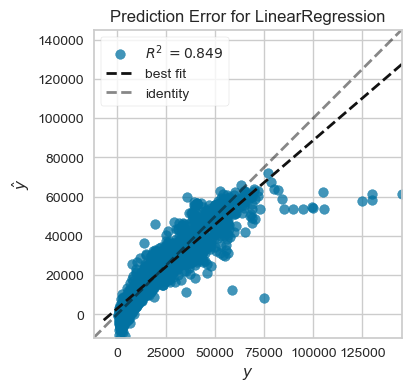

In [973]:
# Fit the training data to the visualizer
visualizer.fit(X_train_preprocessed, y_train)

# Evaluate the model on the test data
visualizer.score(X_test_preprocessed, y_test)

# Show the visualization
visualizer.show();

# Filtering Data and Rebuilding The Model

In [974]:
df = df[(df.price > 7500)&(df.price <80000)]
df

,make_model,price,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 180,24400.0,Compact,Used,Yes,27150.0,Manual,Diesel,Dealer,1461.0,6.0,120.0,Front,5,1330.0,No,Part/Full Leather,2.0,unefficient,2.0,85.0,4.5,Standard,Plus,Safety Premium Package
2,Mercedes-Benz A 180,29800.0,Compact,Used,Yes,21734.0,Automatic,Diesel,Dealer,1461.0,7.0,99.5,Front,1,1445.0,No,Cloth,2.0,unefficient,2.0,85.0,3.9,Standard,Standard,Safety Premium Package
3,Mercedes-Benz A 180,21000.0,Compact,Used,Yes,172700.0,Automatic,Diesel,Dealer,1461.0,7.0,99.5,Front,1,1425.0,No,Cloth,3.0,unefficient,4.0,80.0,3.7,Standard,Standard,Safety Standard Package
4,Mercedes-Benz A 180,26800.0,Compact,Used,Yes,18989.0,Automatic,Diesel,Dealer,1461.0,7.0,99.5,Front,1,1455.0,No,Cloth,2.0,unefficient,2.0,85.0,3.9,Standard,Standard,Safety Premium Package
5,Mercedes-Benz A 180,32900.0,Compact,Pre-registered,Yes,25.0,Manual,Benzine,Dealer,1332.0,6.0,126.0,Front,1,1350.0,No,Cloth,1.0,unefficient,1.0,100.0,0.0,Standard,Standard,Safety Premium Package
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18190,Volvo S90,27190.0,Sedan,Used,Yes,93757.0,Automatic,Diesel,Dealer,1969.0,8.0,127.0,Front,1,1683.0,No,Part/Full Leather,1.0,efficient,4.0,140.0,4.4,Standard,Standard,Safety Premium Plus Package
18191,Volvo S90,27190.0,Sedan,Used,Yes,93757.0,Automatic,Diesel,Dealer,1969.0,8.0,127.0,Front,1,1683.0,No,Part/Full Leather,1.0,efficient,4.0,140.0,4.4,Standard,Standard,Safety Premium Plus Package
18192,Volvo V40,13000.0,Sedan,Used,No,114000.0,Manual,Diesel,Private seller,1969.0,6.0,94.0,Front,9,1532.0,Yes,Cloth,1.0,efficient,4.0,88.0,3.6,Standard,Standard,Safety Premium Package
18194,Volvo S90,37600.0,Sedan,Used,Yes,40345.0,Automatic,Diesel,Dealer,1969.0,8.0,127.0,4WD,1,2077.0,No,Part/Full Leather,2.0,efficient,3.0,288.0,2.0,Standard,Standard,Safety Premium Plus Package


In [975]:
X = df.drop(columns = "price", axis = 1)
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# After dropping outlier observations, we divide the remaining data into X and y and divide it into train and test sets.

In [976]:
X_train_trans= column_trans.fit_transform(X_train)
X_test_trans= column_trans.transform(X_test)

In [977]:
X_train_trans.head()

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Panda,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,make_model_Ford Kuga,make_model_Ford Mondeo,make_model_Ford Mustang,make_model_Hyundai IONIQ,make_model_Hyundai TUCSON,make_model_Hyundai i20,make_model_Hyundai i30,make_model_Mercedes-Benz A 180,make_model_Nissan 350Z,make_model_Nissan 370Z,make_model_Nissan Juke,make_model_Nissan Micra,make_model_Nissan Pulsar,make_model_Nissan Qashqai,make_model_Nissan X-Trail,make_model_Opel Adam,make_model_Opel Astra,make_model_Opel Cascada,make_model_Opel Corsa,make_model_Opel Grandland X,make_model_Opel Insignia,make_model_Peugeot 2008,make_model_Peugeot 206,make_model_Peugeot 207,make_model_Peugeot 208,make_model_Peugeot 3008,make_model_Peugeot 308,make_model_Peugeot 508,make_model_Peugeot RCZ,make_model_Renault Captur,make_model_Renault Clio,make_model_Renault Kadjar,make_model_Renault Megane,make_model_Renault Talisman,make_model_SEAT Arona,make_model_SEAT Ateca,make_model_SEAT Ibiza,make_model_SEAT Leon,make_model_Skoda Fabia,make_model_Skoda Karoq,make_model_Skoda Kodiaq,make_model_Skoda Octavia,make_model_Skoda Scala,make_model_Skoda Superb,make_model_Toyota Auris,make_model_Toyota Aygo,make_model_Toyota C-HR,make_model_Toyota Corolla,make_model_Toyota RAV 4,make_model_Toyota Yaris,make_model_Volvo C30,make_model_Volvo C70,make_model_Volvo S60,make_model_Volvo S90,make_model_Volvo V40,make_model_Volvo V60,make_model_Volvo V90,make_model_Volvo XC40,make_model_Volvo XC60,make_model_Volvo XC90,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road/Pick-up,body_type_Sedan,body_type_Station wagon,gearbox_Automatic,gearbox_Manual,gearbox_Semi-automatic,fuel_type_Benzine,fuel_type_Diesel,fuel_type_Electric,fuel_type_Liquid/Natural Gas,drivetrain_4WD,drivetrain_Front,drivetrain_Rear,type,warranty,seller,full_service_history,upholstery,energy_efficiency_class,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
17873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,163779.0,1969.0,8.0,157.0,5,1615.0,1.0,4.0,184.0,6.8
13703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,52350.0,998.0,5.0,99.0,2,955.0,1.0,5.0,59.0,4.3
7627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,9100.0,999.0,6.0,112.0,4,1165.0,1.0,2.0,66.0,4.9
1843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,31040.0,999.0,5.0,116.5,2,1178.0,1.0,1.0,67.0,0.0
7616,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [978]:
scaler = MinMaxScaler().set_output(transform="pandas")

X_train_scaled = scaler.fit_transform(X_train_trans)
X_test_scaled = scaler.transform(X_test_trans)

In [979]:
lm2 = LinearRegression()
lm2.fit(X_train_scaled, y_train)

LinearRegression()

In [980]:
train_val(lm2, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,8.670242e-01,8.841775e-01
mae,2.636535e+03,2.610308e+03
mse,1.610476e+07,1.421683e+07
rmse,4.013073e+03,3.770522e+03


In [981]:
model = LinearRegression()

scores = cross_validate(model, 
                        X_train_scaled, 
                        y_train, 
                        scoring=['r2', 
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error',
                                'neg_mean_absolute_percentage_error'], 
                        cv =10,
                        return_train_score=True)

pd.DataFrame(scores).iloc[:, 2:].mean()

# We are checking overfitting according to our new data.
# Since train and test scores and error rates are close, we can say there is no overfitting.

test_r2                                     8.520613e-01
train_r2                                    8.565322e-01
test_neg_mean_absolute_error               -2.743622e+03
train_neg_mean_absolute_error              -2.713241e+03
test_neg_mean_squared_error                -1.783410e+07
train_neg_mean_squared_error               -1.737408e+07
test_neg_root_mean_squared_error           -4.213105e+03
train_neg_root_mean_squared_error          -4.167990e+03
test_neg_mean_absolute_percentage_error    -1.377543e-01
train_neg_mean_absolute_percentage_error   -1.361652e-01
dtype: float64

In [982]:
y_pred = lm2.predict(X_test_scaled)

lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = mean_squared_error(y_test, y_pred, squared=False)
lm_mape= mean_absolute_percentage_error(y_test, y_pred)

# We assign the scores to the variables to compare the scores we get from the linear model.

# Prediction Error without Outliers

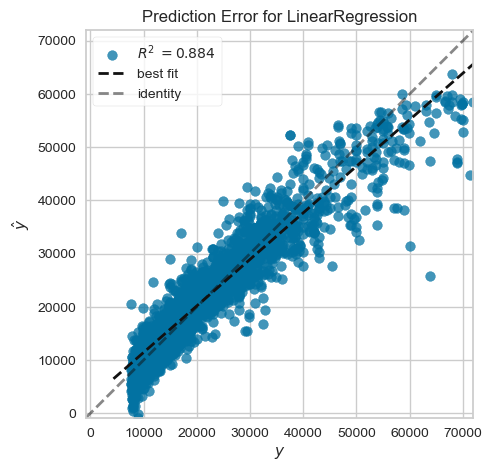

In [983]:
visualizer = RadViz(size=(500, 1000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show();

# After removing the outlier values, we see that the angle between the best fit line and
# the identity line narrows even more.

# Residual Plot without Outliers

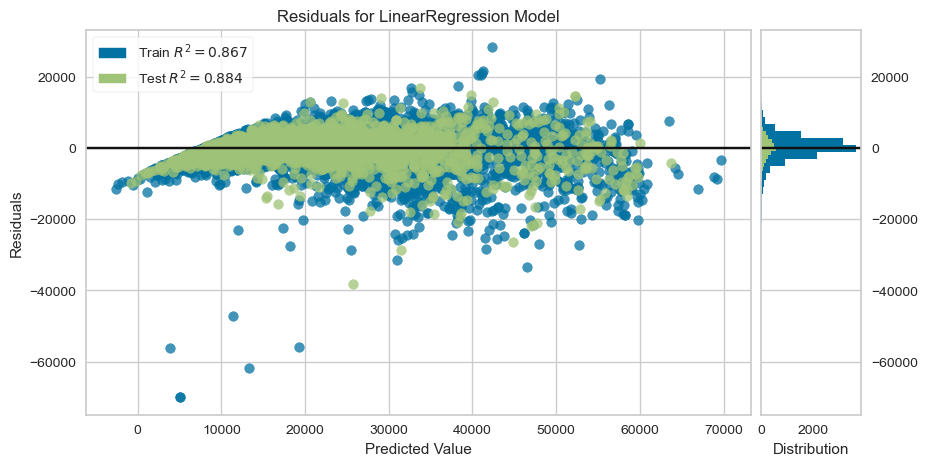

In [984]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 500))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show(); 

# for cars priced at or around 7500 EURO, although our scores have improved
# still not suitable for linear regression.

## Pipeline
- Read the documentation and apply pipeline
- link : https://scikit-learn.org/stable/modules/compose.html

In [985]:
X = df.drop(columns = ["price"])
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# After dropping outlier observations, we divide the remaining data into X and y and divide it into train and test sets.

In [986]:
# Define which columns are numerical and which are categorical
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Create preprocessing pipelines for both numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])


In [987]:
# Append estimator to preprocessing pipeline
# Now we have a full prediction pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])



In [988]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [989]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['mileage', 'engine_size', 'gears', 'co_emissions', 'extras',
       'empty_weight', 'previous_owner', 'age', 'power_kW', 'cons_avg'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['make_model', 'body_type', 'type', 'warranty', 'gearbox', 'fuel_type',
       'seller', 'drivetrain', 'full_service_history', 'upholstery',
       'energy_efficiency_class', 'comfort_&_convenience_Package',
       'entertainment_&_media_Package', 'safety_&_security_Package'],
      dtype='object'))])),
                ('regressor', LinearRegression())])

In [990]:

# Predict on training and test data
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

In [991]:
# Evaluate the model
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(f"Train | R2: {train_r2} | MAE: {train_mae} | MSE: {train_mse} | RMSE: {train_rmse}")
print(f"Test | R2: {test_r2} | MAE: {test_mae} | MSE: {test_mse} | RMSE: {test_rmse}")

Train | R2: 0.8730357149708113 | MAE: 2583.3096374324273 | MSE: 15529092.312537666 | RMSE: 3940.696932337942
Test | R2: 0.8797793087170405 | MAE: 2596.7036648100184 | MSE: 14353729.274258967 | RMSE: 3788.6315833370454


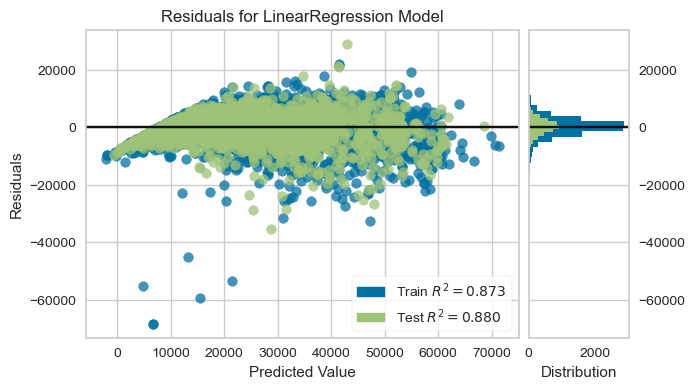

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [992]:
# Visualize residuals
visualizer = ResidualsPlot(pipeline)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

## 4. Implement Ridge Regression

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True  
- ***Fit the model (use pipeline)***
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.

## Ridge

In [993]:
from sklearn.linear_model import Ridge

In [994]:
pipeline_ridge = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', Ridge())])

In [995]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [996]:
# Fit the Ridge regression model on the training data
pipeline_ridge.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['mileage', 'engine_size', 'gears', 'co_emissions', 'extras',
       'empty_weight', 'previous_owner', 'age', 'power_kW', 'cons_avg'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['make_model', 'body_type', 'type', 'warranty', 'gearbox', 'fuel_type',
       'seller', 'drivetrain', 'full_service_history', 'upholstery',
       'energy_efficiency_class', 'comfort_&_convenience_Package',
       'entertainment_&_media_Package', 'safety_&_security_Package'],
      dtype='object'))])),
                ('regressor', Ridge())])

In [997]:
train_val(pipeline_ridge, X_train, y_train, X_test, y_test)

,train,test
R2,8.715998e-01,8.883260e-01
mae,2.581027e+03,2.552541e+03
mse,1.555060e+07,1.370762e+07
rmse,3.943425e+03,3.702381e+03


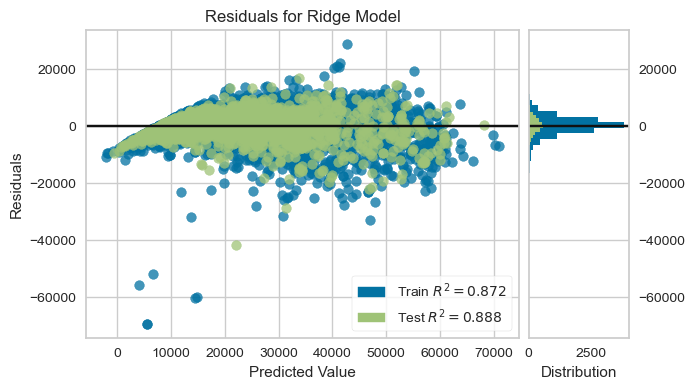

In [998]:
# Visualize residuals
visualizer = ResidualsPlot(pipeline_ridge)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

## Cross Validation

In [999]:
from sklearn.model_selection import  KFold
pipeline_ridge = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', Ridge(alpha=1.0))])  # Example alpha value

# Define k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(pipeline_ridge, X, y, cv=kf, scoring='r2')

# Print cross-validation scores
print("Cross-validation R2 scores:", cv_scores)
print("Mean R2 score:", np.mean(cv_scores))

Cross-validation R2 scores: [0.88832681 0.86219272 0.87543841 0.85776892 0.87907259]
Mean R2 score: 0.8725598897230666


In [1000]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", StandardScaler()), 
              ("Ridge", Ridge())]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model, 
                        X_train, 
                        y_train,
                        scoring=['r2', 
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'], 
                        cv=10, 
                        return_train_score=True)

In [1001]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error
1,0.064340,0.013005,0.857185,0.868782,-2755.465024,-2625.213705,-1.696943e+07,-1.592519e+07,-4119.396431,-3990.638389,-0.139561,-0.132554
2,0.059737,0.012015,0.838950,0.870410,-2653.897929,-2634.254313,-1.731307e+07,-1.588912e+07,-4160.897248,-3986.115689,-0.136232,-0.132866
3,0.056015,0.011985,0.876957,0.866474,-2607.366198,-2637.307024,-1.569937e+07,-1.607508e+07,-3962.242469,-4009.373595,-0.133290,-0.133221
4,0.065000,0.013886,0.876369,0.866563,-2688.781101,-2627.046521,-1.579238e+07,-1.606082e+07,-3973.962592,-4007.595821,-0.133495,-0.133039
5,0.055854,0.012070,0.874421,0.866776,-2596.338268,-2641.215766,-1.527553e+07,-1.612496e+07,-3908.392825,-4015.590202,-0.126534,-0.133800
6,0.055013,0.010499,0.874313,0.866853,-2637.177611,-2629.134859,-1.587879e+07,-1.604823e+07,-3984.819805,-4006.024438,-0.133701,-0.132735
7,0.054652,0.010505,0.819117,0.872759,-2782.226656,-2613.851956,-2.113743e+07,-1.547017e+07,-4597.546124,-3933.214110,-0.140654,-0.132228
8,0.056262,0.011497,0.876768,0.866618,-2598.306258,-2643.604327,-1.447748e+07,-1.620635e+07,-3804.927763,-4025.711375,-0.133383,-0.133261
9,0.055775,0.011530,0.897245,0.864265,-2512.999927,-2655.621204,-1.262716e+07,-1.641214e+07,-3553.471833,-4051.190386,-0.132181,-0.133737
10,0.055792,0.011872,0.849432,0.869658,-2760.855409,-2616.347044,-1.864317e+07,-1.574621e+07,-4317.773283,-3968.148892,-0.134533,-0.132682


In [1002]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                     8.640757e-01
train_r2                                    8.679158e-01
test_neg_mean_absolute_error               -2.659341e+03
train_neg_mean_absolute_error              -2.632360e+03
test_neg_mean_squared_error                -1.638138e+07
train_neg_mean_squared_error               -1.599583e+07
test_neg_root_mean_squared_error           -4.038343e+03
train_neg_root_mean_squared_error          -3.999360e+03
test_neg_mean_absolute_percentage_error    -1.343565e-01
train_neg_mean_absolute_percentage_error   -1.330122e-01
dtype: float64

## Finding best alpha for Ridge

In [1003]:
from sklearn.model_selection import  GridSearchCV

In [1004]:
param_grid = {
    'regressor__alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]  # Specify the alpha values to test
}

In [1005]:
grid_search = GridSearchCV(estimator=pipeline_ridge, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['mileage', 'engine_size', 'gears', 'co_emissions', 'extras',
       'empty_weight', 'previous_owner', 'age', 'power_kW', 'cons_avg'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='i...
                                                                         Index(['make_model', 'body_type', 'type', 'warranty', 'gearbox', 'fuel_type',
       'seller', 'drivetrain', 'full_service_history', 'upholstery',
       'energy_efficiency_class', 'comfort_&_convenience_Package',
       'entertainment_&_media_Package', 'safety_&_security_Package'],
      dtype='object'))])),
                                       ('regressor', Ridge())]),
             param_grid={'regressor__alpha': [0.001, 0.01, 0.1, 1.0, 10.0,
                                              100.0]},
             scoring='neg_mean_squared_error')

In [1006]:
# Refit the model with the best alpha parameter
best_alpha = grid_search.best_params_['regressor__alpha']
pipeline_ridge_best = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('regressor', Ridge(alpha=best_alpha))])
print('best_alpha :', best_alpha)


best_alpha : 0.01


In [1007]:
pipeline_ridge_best.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['mileage', 'engine_size', 'gears', 'co_emissions', 'extras',
       'empty_weight', 'previous_owner', 'age', 'power_kW', 'cons_avg'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['make_model', 'body_type', 'type', 'warranty', 'gearbox', 'fuel_type',
       'seller', 'drivetrain', 'full_service_history', 'upholstery',
       'energy_efficiency_class', 'comfort_&_convenience_Package',
       'entertainment_&_media_Package', 'safety_&_security_Package'],
      dtype='object'))])),
                ('regressor', Ridge(alpha=0.01))])

In [1008]:
train_val(pipeline_ridge_best, X_train, y_train, X_test, y_test)

,train,test
R2,8.716320e-01,8.881887e-01
mae,2.580322e+03,2.554278e+03
mse,1.554671e+07,1.372447e+07
rmse,3.942931e+03,3.704655e+03


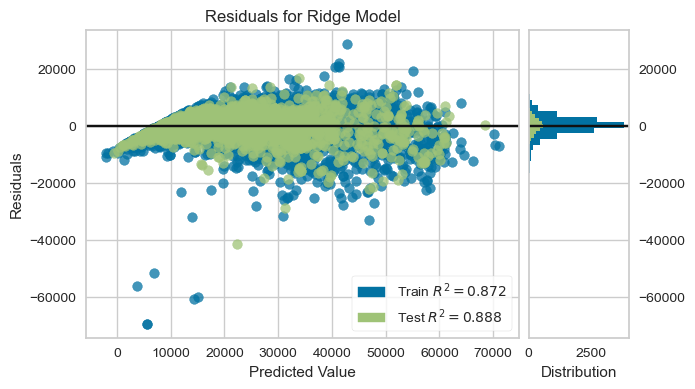

<Axes: title={'center': 'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [1009]:
# Visualize residuals for the model with the best alpha
visualizer_best = ResidualsPlot(pipeline_ridge_best)
visualizer_best.fit(X_train, y_train)
visualizer_best.score(X_test, y_test)
visualizer_best.show()

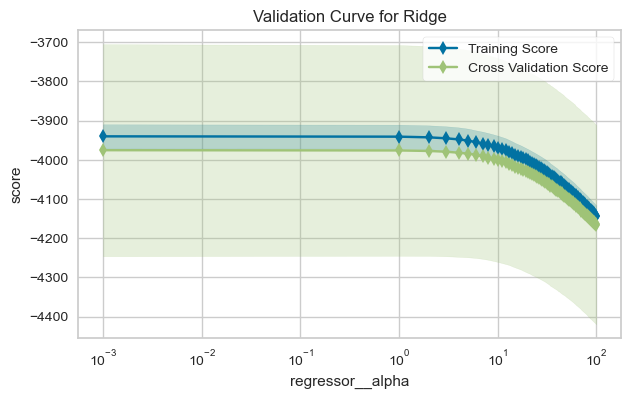

In [1010]:
from yellowbrick.model_selection import ValidationCurve
# Validation Curve with Yellowbrick
viz = ValidationCurve(
    pipeline_ridge_best, 
    param_name="regressor__alpha",  # Parameter name in pipeline
    param_range=np.linspace(0.001, 100, 100),
    logx=True, 
    cv=10, 
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

viz.fit(X_train, y_train)
viz.show();

In [1011]:
train_val(pipeline_ridge_best, X_train, y_train, X_test, y_test)

,train,test
R2,8.716320e-01,8.881887e-01
mae,2.580322e+03,2.554278e+03
mse,1.554671e+07,1.372447e+07
rmse,3.942931e+03,3.704655e+03


In [1012]:
y_pred = pipeline_ridge_best.predict(X_test)
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = mean_squared_error(y_test, y_pred, squared=False)
rm_mape= mean_absolute_percentage_error(y_test, y_pred)

## 5. Implement Lasso Regression

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True
- ***Fit the model (use pipeline)***
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [1013]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso

In [1014]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso())]

lasso_model = Pipeline(steps=operations)

lasso_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'gearbox', 'fuel_type',
                                                   'drivetrain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered'],
                                                                             ['No',
                                                                              'Y...
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['type', 'warranty', 'seller',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso())])

In [1015]:
train_val(lasso_model, X_train, y_train, X_test, y_test)

,train,test
R2,8.674405e-01,8.848942e-01
mae,2.633391e+03,2.597935e+03
mse,1.605434e+07,1.412886e+07
rmse,4.006787e+03,3.758838e+03


## Cross Validation

In [1016]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", StandardScaler()), 
              ("Lasso", Lasso())]

pipe_model = Pipeline(steps=operations)
scores = cross_validate(pipe_model, 
                        X_train, 
                        y_train,
                        scoring=['r2', 
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv=10, 
                        return_train_score=True)

In [1017]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                     8.640895e-01
train_r2                                    8.679113e-01
test_neg_mean_absolute_error               -2.658848e+03
train_neg_mean_absolute_error              -2.632069e+03
test_neg_mean_squared_error                -1.638012e+07
train_neg_mean_squared_error               -1.599638e+07
test_neg_root_mean_squared_error           -4.038238e+03
train_neg_root_mean_squared_error          -3.999429e+03
test_neg_mean_absolute_percentage_error    -1.342947e-01
train_neg_mean_absolute_percentage_error   -1.329643e-01
dtype: float64

## Finding best alpha for Lasso

In [1018]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", StandardScaler()), 
              ("Lasso", Lasso())]

model = Pipeline(steps=operations)

# Define the parameter grid
alpha_space = np.logspace(-3, 2, 50)  # Example alpha values from 0.001 to 100
param_grid = {
    'Lasso__alpha': alpha_space
}

param_grid = {'Lasso__alpha':alpha_space}# Parameter names should be used together with the model name defined in the pipeline.

lasso_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [1019]:
lasso_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'gearbox',
                                                                          'fuel_type',
                                                                          'drivetrain']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Used',
                                                                                                     "Employee's "
                                                                                                     'car',
                                                                                                     'Demonstratio...
       7.19685673e-01, 9.10298178e-01, 1.15139540e+00, 1.45634848e+00,
       1.84206997e+00, 2.32995181e+00, 2.94705170e+00, 3.72759372e+00,
       4.71486636e+00, 5.96362332e+00, 7.54312006e+00, 9.54095476e+00,
       1.20679264e+01, 1.52641797e+01, 1.93069773e+01, 2.44205309e+01,
       3.08884360e+01, 3.90693994e+01, 4.94171336e+01, 6.25055193e+01,
       7.90604321e+01, 1.00000000e+02])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [1020]:
lasso_grid_model.best_estimator_

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'gearbox', 'fuel_type',
                                                   'drivetrain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered'],
                                                                             ['No',
                                                                              'Y...
                                                                              'Package']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['type', 'warranty', 'seller',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('Lasso', Lasso(alpha=0.9102981779915218))])

In [1021]:
from sklearn.metrics import make_scorer


In [1022]:
model = Pipeline(steps=operations)

# Define the parameter grid
alpha_space = np.logspace(-3, 2, 50)  # Example alpha values from 0.001 to 100
param_grid = {
    'Lasso__alpha': alpha_space
}

# Define scoring function (negative RMSE)
scoring = make_scorer(lambda y_true, y_pred: -np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)

# Perform GridSearchCV
lasso_grid_model = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring=scoring,
    cv=10,
    n_jobs=-1,
    return_train_score=True
)



In [1023]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit GridSearchCV
lasso_grid_model.fit(X_train, y_train)

# Print results
print("Best alpha parameter found:", lasso_grid_model.best_params_)
print("Best RMSE score:", -lasso_grid_model.best_score_)

# Predict with the best model
y_pred = lasso_grid_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE on test set with best alpha: {rmse}")

Best alpha parameter found: {'Lasso__alpha': 100.0}
Best RMSE score: -4142.366121151213
RMSE on test set with best alpha: 3848.489189559073


In [1024]:
pd.DataFrame(lasso_grid_model.cv_results_).loc[lasso_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     4142.366121
mean_train_score    4119.589827
Name: 49, dtype: object

In [1025]:
train_val(lasso_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,8.597088e-01,8.793380e-01
mae,2.691563e+03,2.632967e+03
mse,1.699073e+07,1.481087e+07
rmse,4.121981e+03,3.848489e+03


In [1026]:
y_pred = lasso_grid_model.predict(X_test)
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = mean_squared_error(y_test, y_pred, squared=False)
lasm_mape= mean_absolute_percentage_error(y_test, y_pred)

In [1027]:
pd.DataFrame(data=lasso_grid_model.best_estimator_["Lasso"].coef_, 
             index=lasso_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out(), 
             columns=["Coef"]).sort_values("Coef")

,Coef
age,-2896.785205
mileage,-2564.728991
gearbox_Manual,-673.422034
make_model_Dacia Sandero,-382.121584
make_model_Fiat Tipo,-267.032308
make_model_Opel Astra,-256.358857
cons_avg,-226.440656
make_model_Hyundai i30,-182.923868
make_model_SEAT Leon,-161.405933
make_model_Opel Corsa,-149.278291


## 6. Implement Elastic-Net

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True
- ***Fit the model (use pipeline)***
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

In [1028]:
from sklearn.linear_model import ElasticNet

In [1029]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("ElasticNet", ElasticNet())]

elastic_model = Pipeline(steps=operations)

elastic_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'gearbox', 'fuel_type',
                                                   'drivetrain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered'],
                                                                             ['No',
                                                                              'Y...
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['type', 'warranty', 'seller',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('ElasticNet', ElasticNet())])

In [1030]:
train_val(elastic_model, X_train, y_train, X_test, y_test)

,train,test
R2,4.401686e-01,4.518078e-01
mae,5.878749e+03,5.834880e+03
mse,6.780141e+07,6.728880e+07
rmse,8.234161e+03,8.202975e+03


## Cross Validation

In [1031]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("ElasticNet", ElasticNet())]

model = Pipeline(steps=operations)

scores = cross_validate(model, 
                        X_train, 
                        y_train,
                        scoring=['r2', 
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'], 
                        cv=10, 
                        return_train_score=True)

In [1032]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                     4.399405e-01
train_r2                                    4.408856e-01
test_neg_mean_absolute_error               -5.877504e+03
train_neg_mean_absolute_error              -5.874236e+03
test_neg_mean_squared_error                -6.780924e+07
train_neg_mean_squared_error               -6.771294e+07
test_neg_root_mean_squared_error           -8.231787e+03
train_neg_root_mean_squared_error          -8.228776e+03
test_neg_mean_absolute_percentage_error    -3.145575e-01
train_neg_mean_absolute_percentage_error   -3.143852e-01
dtype: float64

## Finding best alpha and l1_ratio for ElasticNet

In [1033]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("ElasticNet", ElasticNet())]

model = Pipeline(steps=operations)

param_grid = {'ElasticNet__alpha':[0.001,0.01, 0.5, 1, 2,  3, 4],
              'ElasticNet__l1_ratio':[0.5, 0.7, 0.9, 0.95, 0.99, 1]}

elastic_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [1034]:
elastic_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'gearbox',
                                                                          'fuel_type',
                                                                          'drivetrain']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Used',
                                                                                                     "Employee's "
                                                                                                     'car',
                                                                                                     'Demonstratio...
                                                                          'comfort_&_convenience_Package',
                                                                          'entertainment_&_media_Package',
                                                                          'safety_&_security_Package'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', MinMaxScaler()),
                                       ('ElasticNet', ElasticNet())]),
             n_jobs=-1,
             param_grid={'ElasticNet__alpha': [0.001, 0.01, 0.5, 1, 2, 3, 4],
                         'ElasticNet__l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99,
                                                  1]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [1035]:
elastic_grid_model.best_estimator_

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'gearbox', 'fuel_type',
                                                   'drivetrain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered'],
                                                                             ['No',
                                                                              'Y...
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['type', 'warranty', 'seller',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('ElasticNet', ElasticNet(alpha=0.001, l1_ratio=0.95))])

In [1036]:
pd.DataFrame(elastic_grid_model.cv_results_).loc[elastic_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    -4037.803509
mean_train_score   -3999.938757
Name: 3, dtype: object

In [1037]:
train_val(elastic_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,8.677290e-01,8.848001e-01
mae,2.631148e+03,2.602371e+03
mse,1.601939e+07,1.414041e+07
rmse,4.002423e+03,3.760373e+03


In [1038]:
y_pred = elastic_grid_model.predict(X_test)
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = mean_squared_error(y_test, y_pred, squared=False)
em_mape= mean_absolute_percentage_error(y_test, y_pred)

## Feature İmportance
- Select the first 6 important features with the use of LASSO and re-fit the model

In [1039]:
df_feat_imp =pd.DataFrame(
                         data=lasso_grid_model.best_estimator_["Lasso"].coef_, 
                         index=lasso_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out(), 
                         columns=["Coef"]
                         ).sort_values("Coef")

In [1040]:
df_feat_imp

,Coef
age,-2896.785205
mileage,-2564.728991
gearbox_Manual,-673.422034
make_model_Dacia Sandero,-382.121584
make_model_Fiat Tipo,-267.032308
make_model_Opel Astra,-256.358857
cons_avg,-226.440656
make_model_Hyundai i30,-182.923868
make_model_SEAT Leon,-161.405933
make_model_Opel Corsa,-149.278291


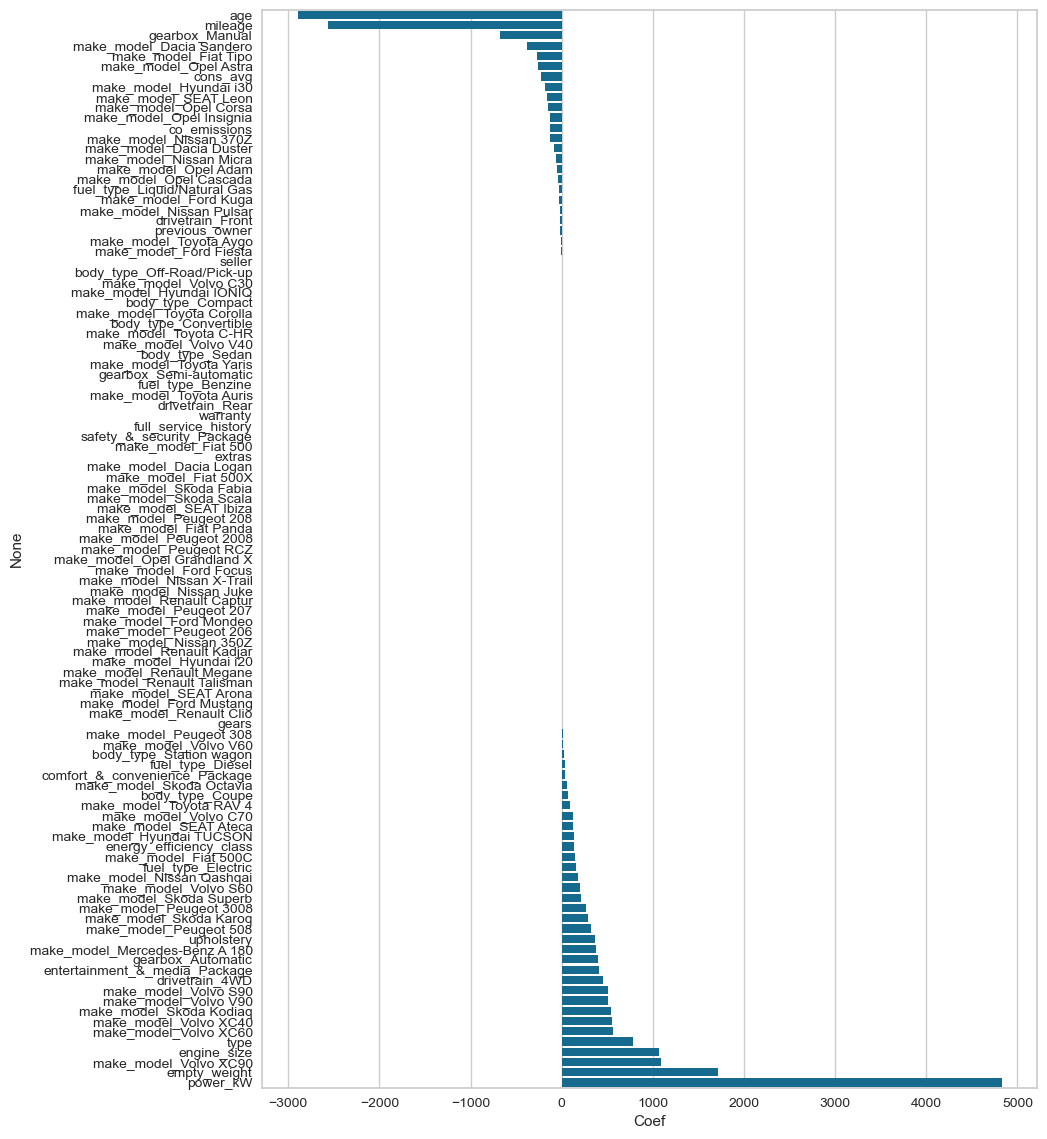

In [1041]:
plt.figure(figsize=(10,14))
ax= sns.barplot(data= df_feat_imp, 
            x=df_feat_imp.Coef, 
            y=df_feat_imp.index)

In [1042]:
lasso_grid_model.best_estimator_["Lasso"]

Lasso(alpha=100.0)

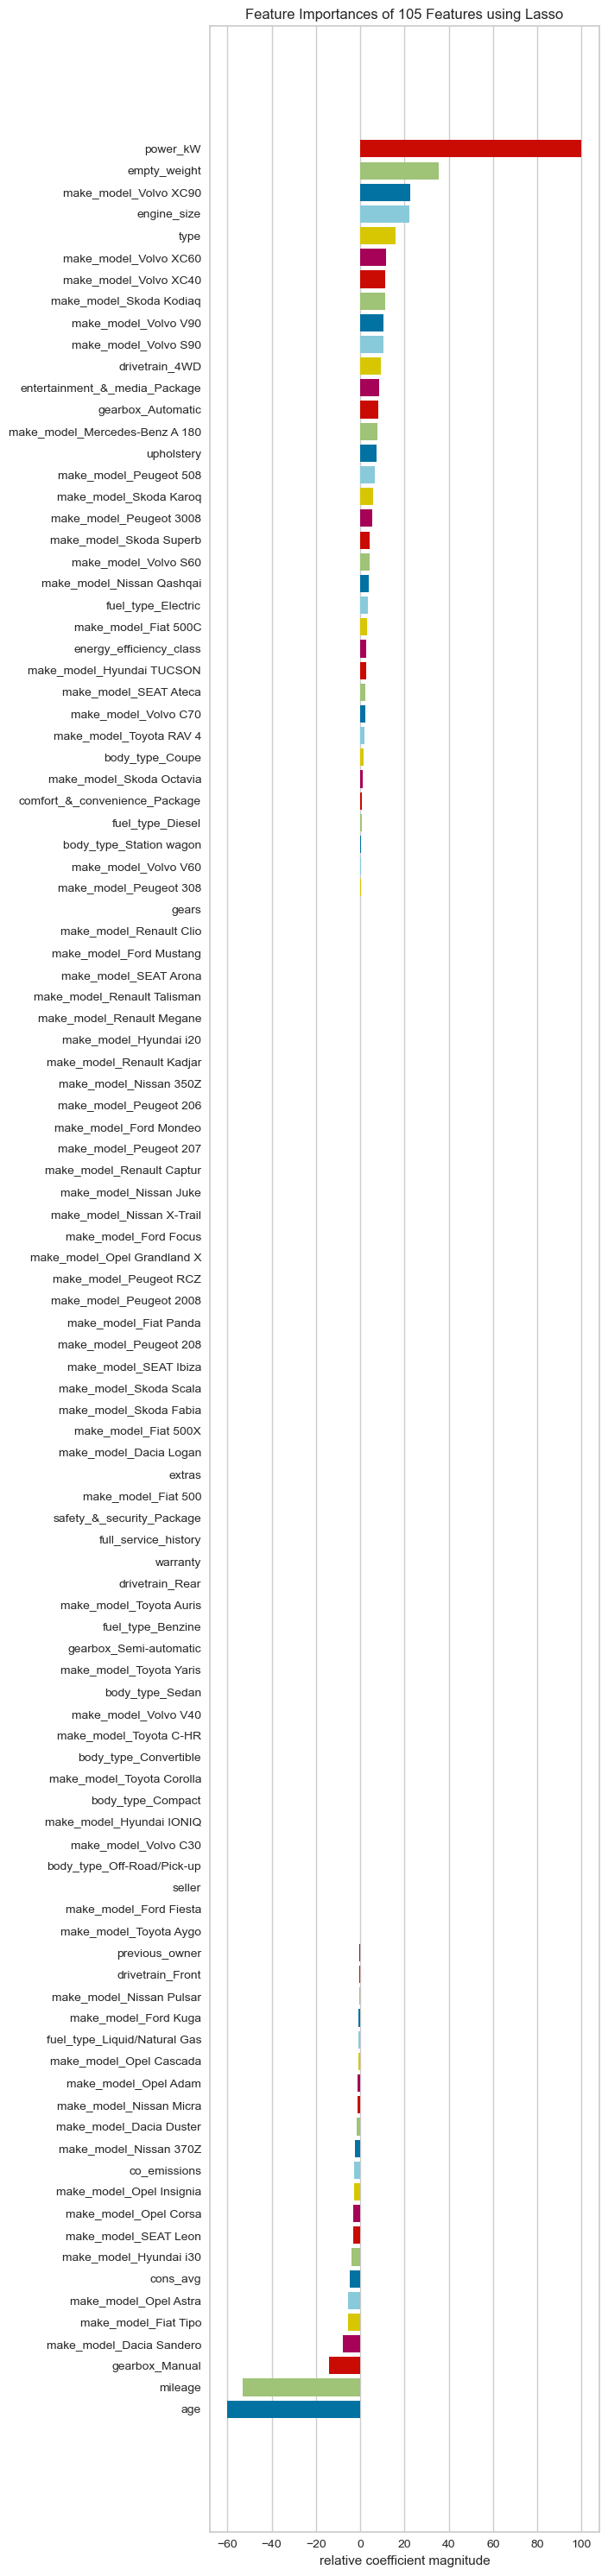

In [1043]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = lasso_grid_model.best_estimator_["Lasso"] # Lasso(alpha=0.001)

viz = FeatureImportances(model, 
                         labels=lasso_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out())

visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show();

# We do not forget that we need to use the lasso model, as we will do a feature selection.

In [1044]:
df_new = df[["make_model", "power_kW", "mileage","age", "engine_size", "type", "price"]]

# we select the top 6 features that have the most impact on prediction. Here, a question may come up as
# "Why the make_model feature was chosen?". When the above image is examined, we also chose the make_model feature
# since we saw that the make_model feature has unique categorical observations (Audi A3, AudiA1, Renault Espace etc.)
# among the featurs that have the most impact on the prediction.

# Although the "type" feature does not contribute much to the prediction,
# it has been kept in the data in order to have a feature in our data that we will make the ordinal transformation.

In [1045]:
df_new

,make_model,power_kW,mileage,age,engine_size,type,price
0,Mercedes-Benz A 180,85.0,27150.0,2.0,1461.0,Used,24400.0
2,Mercedes-Benz A 180,85.0,21734.0,2.0,1461.0,Used,29800.0
3,Mercedes-Benz A 180,80.0,172700.0,4.0,1461.0,Used,21000.0
4,Mercedes-Benz A 180,85.0,18989.0,2.0,1461.0,Used,26800.0
5,Mercedes-Benz A 180,100.0,25.0,1.0,1332.0,Pre-registered,32900.0
...,...,...,...,...,...,...,...
18190,Volvo S90,140.0,93757.0,4.0,1969.0,Used,27190.0
18191,Volvo S90,140.0,93757.0,4.0,1969.0,Used,27190.0
18192,Volvo V40,88.0,114000.0,4.0,1969.0,Used,13000.0
18194,Volvo S90,288.0,40345.0,3.0,1969.0,Used,37600.0


In [1046]:
X = df_new.drop(columns = ["price"])
y = df_new.price

# According to our data set with 5 new features, we determine our X and y and reconstruct the model.
# And we repeat the operations we did above.

In [1047]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1048]:
X_train.head()

,make_model,power_kW,mileage,age,engine_size,type
17873,Volvo V60,184.0,163779.0,4.0,1969.0,Used
13703,Ford Fiesta,59.0,52350.0,5.0,998.0,Used
7627,SEAT Arona,66.0,9100.0,2.0,999.0,Used
1843,Renault Clio,67.0,31040.0,1.0,999.0,Used
7616,SEAT Arona,70.0,25515.0,4.0,999.0,Used


In [1049]:
cat_onehot = ['make_model']
cat_ordinal = ['type']

cat_for_type = ["Used", "Employee's car", "Demonstration", "Pre-registered"]

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_onehot),
                                       (OrdinalEncoder(categories= [cat_for_type]), cat_ordinal),
                                        remainder='passthrough', #MinMaxScaler()
                                        verbose_feature_names_out=False) 

In [1050]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso(alpha=0.001))]

lasso_final_model = Pipeline(steps=operations)

lasso_final_model.fit(X_train, y_train)
train_val(lasso_final_model, X_train, y_train, X_test, y_test)

,train,test
R2,8.533995e-01,8.708165e-01
mae,2.809523e+03,2.798699e+03
mse,1.775485e+07,1.585685e+07
rmse,4.213651e+03,3.982066e+03


In [1051]:
y_pred = lasso_final_model.predict(X_test)
fm_R2 = r2_score(y_test, y_pred)
fm_mae = mean_absolute_error(y_test, y_pred)
fm_rmse = mean_squared_error(y_test, y_pred, squared=False)
fm_mape= mean_absolute_percentage_error(y_test, y_pred)

## Cross Validate

In [1052]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso(alpha=0.001))]

model = Pipeline(steps=operations)

scores = cross_validate(model, 
                        X_train, 
                        y_train,
                        scoring=['r2', 
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv=10, 
                        return_train_score=True)

In [1053]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                     8.506976e-01
train_r2                                    8.535003e-01
test_neg_mean_absolute_error               -2.828573e+03
train_neg_mean_absolute_error              -2.808809e+03
test_neg_mean_squared_error                -1.800592e+07
train_neg_mean_squared_error               -1.774177e+07
test_neg_root_mean_squared_error           -4.235798e+03
train_neg_root_mean_squared_error          -4.212003e+03
test_neg_mean_absolute_percentage_error    -1.423093e-01
train_neg_mean_absolute_percentage_error   -1.413046e-01
dtype: float64

In [1054]:
y_pred = lasso_final_model.predict(X_test)
fm_R2 = r2_score(y_test, y_pred)
fm_mae = mean_absolute_error(y_test, y_pred)
fm_rmse = mean_squared_error(y_test, y_pred, squared=False)
fm_mape= mean_absolute_percentage_error(y_test, y_pred)

## 7. Visually Compare Models Performance In a Graph

In [1055]:
compare = pd.DataFrame({"Model": ["linear_m","ridge_m", "lasso_m", "elastic_m", "final_m"],
                        "r2_score": [lm_R2, rm_R2, lasm_R2, em_R2, fm_R2],
                        "mae": [lm_mae, rm_mae, lasm_mae, em_mae, fm_mae],
                        "rmse": [lm_rmse, rm_rmse, lasm_rmse, em_rmse, fm_rmse],
                        "mape": [lm_mape, rm_mape, lasm_mape, em_mape, fm_mape]})
compare

# We assign the metrics we get from all models to the scores variable in dict format.

,Model,r2_score,mae,rmse,mape
0,linear_m,0.884178,2610.307528,3770.521539,0.132744
1,ridge_m,0.888189,2554.278356,3704.655091,0.129281
2,lasso_m,0.879338,2632.967107,3848.489190,0.131094
3,elastic_m,0.884800,2602.370654,3760.373482,0.132020
4,final_m,0.870817,2798.698502,3982.065872,0.141901


In [1056]:
compare.sort_values(by="r2_score", ascending=False) #  ascending=False sorts in descending (high-->low) order.

,Model,r2_score,mae,rmse,mape
1,ridge_m,0.888189,2554.278356,3704.655091,0.129281
3,elastic_m,0.884800,2602.370654,3760.373482,0.132020
0,linear_m,0.884178,2610.307528,3770.521539,0.132744
2,lasso_m,0.879338,2632.967107,3848.489190,0.131094
4,final_m,0.870817,2798.698502,3982.065872,0.141901


In [1057]:
compare.sort_values(by="mae", ascending=True) #  ascending=True sorts in ascending (low-->high) order.

,Model,r2_score,mae,rmse,mape
1,ridge_m,0.888189,2554.278356,3704.655091,0.129281
3,elastic_m,0.884800,2602.370654,3760.373482,0.132020
0,linear_m,0.884178,2610.307528,3770.521539,0.132744
2,lasso_m,0.879338,2632.967107,3848.489190,0.131094
4,final_m,0.870817,2798.698502,3982.065872,0.141901


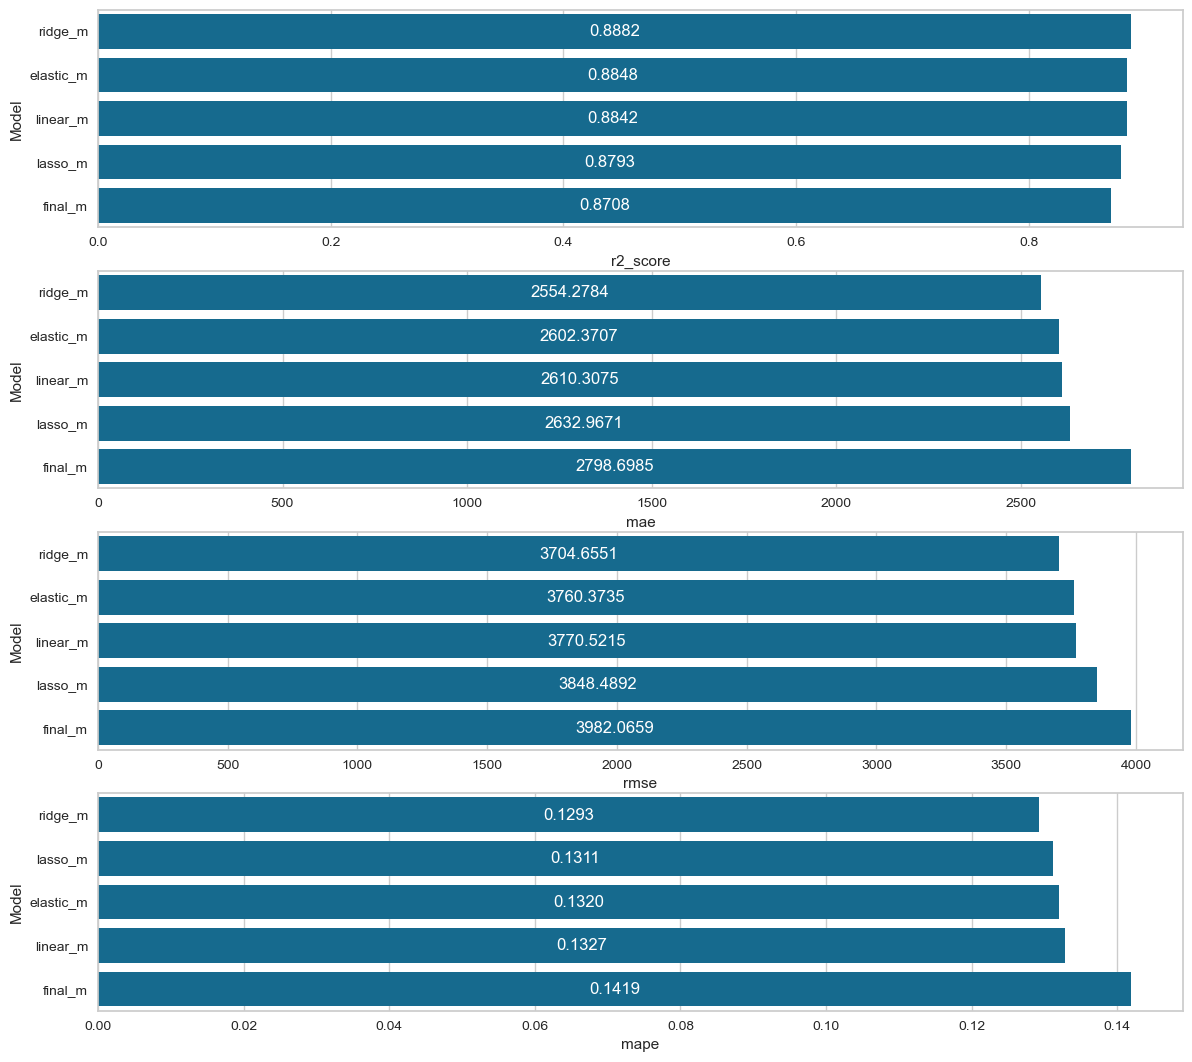

In [1058]:
plt.figure(figsize=(14,13))

plt.subplot(411)
compare = compare.sort_values(by="r2_score", ascending=False)
ax=sns.barplot(x="r2_score", y="Model", data=compare)
ax.bar_label(ax.containers[0],fmt="%.4f", label_type="center", color="white")

plt.subplot(412)
compare = compare.sort_values(by="mae", ascending=True)
ax=sns.barplot(x="mae", y="Model", data=compare)
ax.bar_label(ax.containers[0],fmt="%.4f", label_type="center", color="white")

plt.subplot(413)
compare = compare.sort_values(by="rmse", ascending=True)
ax=sns.barplot(x="rmse", y="Model", data=compare)
ax.bar_label(ax.containers[0],fmt="%.4f", label_type="center", color="white")

plt.subplot(414)
compare = compare.sort_values(by="mape", ascending=True)
ax=sns.barplot(x="mape", y="Model", data=compare)
ax.bar_label(ax.containers[0],fmt="%.4f", label_type="center", color="white")
plt.show();

## Prediction a new observation
- Create an observation and predict its price

In [1059]:
X = df_new.drop(columns = ["price"])
y = df_new.price

# After trying all models and deciding on the model with the most optimal score,
# we separate the data we use for this model as X and y.
# Note that we do not distinguish between train and test sets in the final stage.

In [1060]:
X.head()

,make_model,power_kW,mileage,age,engine_size,type
0,Mercedes-Benz A 180,85.0,27150.0,2.0,1461.0,Used
2,Mercedes-Benz A 180,85.0,21734.0,2.0,1461.0,Used
3,Mercedes-Benz A 180,80.0,172700.0,4.0,1461.0,Used
4,Mercedes-Benz A 180,85.0,18989.0,2.0,1461.0,Used
5,Mercedes-Benz A 180,100.0,25.0,1.0,1332.0,Pre-registered


In [1061]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso(alpha=0.001))]
final_model = Pipeline(steps=operations)

# After comparing the scores in the table above, we decide on the Lasso model,
# which consists of 6 features, as our final model.
# In the lasso model with 6 features, we re-build the model with the hyperparameter, where we get the best score.

In [1062]:
final_model.fit(X, y)

# What does final_model.fit(X,y) do in order?
# 1. Since the first operation to be done in final_model is column_trans;
#    a. Onehotencoder transformation is applied to the features in X data that will be transformed (cat_onehot) 
#       according to the information of X data.
#    b. Ordinalencoder transformation is applied to the features in X data that will be transformed (cat_ordinal) 
#       according to the information of X data.
#    c. No operation is performed on the numeric features other than the features that have been transformed. They are
#       left as they are.
# 2. Since the second operation to be done in final_model is MinMaxScaler();
#    a. Minmax scale is applied to the new numeric X we obtained after the transformation according to the min and max
#       information of X data. Minmaxscale was applied so that the observations consisting of 0 and 1 in our data remain
#       as 0 and 1.
# 3. Since the third operation to be done in final_model is Lasso();
#    a. The transformed and scaled X is given to the Lasso model along with y and the training is completed.

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered']]),
                                                  ['type'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso(alpha=0.001))])

In [1063]:
X

,make_model,power_kW,mileage,age,engine_size,type
0,Mercedes-Benz A 180,85.0,27150.0,2.0,1461.0,Used
2,Mercedes-Benz A 180,85.0,21734.0,2.0,1461.0,Used
3,Mercedes-Benz A 180,80.0,172700.0,4.0,1461.0,Used
4,Mercedes-Benz A 180,85.0,18989.0,2.0,1461.0,Used
5,Mercedes-Benz A 180,100.0,25.0,1.0,1332.0,Pre-registered
...,...,...,...,...,...,...
18190,Volvo S90,140.0,93757.0,4.0,1969.0,Used
18191,Volvo S90,140.0,93757.0,4.0,1969.0,Used
18192,Volvo V40,88.0,114000.0,4.0,1969.0,Used
18194,Volvo S90,288.0,40345.0,3.0,1969.0,Used


In [1064]:
my_dict = {
    "make_model": 'Mercedes-Benz A 180',
    "power_kW": 85,
    "mileage": 30000,
    "age": 3,
    "engine_size": 1461,
    "type": "Used"
}

In [1065]:
X.head()

# The feature order of the observation we will predict should be the same as the feature order of the data we train.

,make_model,power_kW,mileage,age,engine_size,type
0,Mercedes-Benz A 180,85.0,27150.0,2.0,1461.0,Used
2,Mercedes-Benz A 180,85.0,21734.0,2.0,1461.0,Used
3,Mercedes-Benz A 180,80.0,172700.0,4.0,1461.0,Used
4,Mercedes-Benz A 180,85.0,18989.0,2.0,1461.0,Used
5,Mercedes-Benz A 180,100.0,25.0,1.0,1332.0,Pre-registered


In [1066]:
new_obs = pd.DataFrame([my_dict])
new_obs

# we found that the feature rankings are the same

,make_model,power_kW,mileage,age,engine_size,type
0,Mercedes-Benz A 180,85,30000,3,1461,Used


In [1067]:
final_model.predict(new_obs)

array([27166.39314334])

In [1068]:
# when feature order is different

my_dict = {
    "type": "Used",
    "power_kW": 85,
    "make_model": 'Mercedes-Benz A 180',
    "engine_size": 1461,
    "mileage": 30000,
    "age": 3,
    "color":"white"
}

new_obs = pd.DataFrame([my_dict])
new_obs

,type,power_kW,make_model,engine_size,mileage,age,color
0,Used,85,Mercedes-Benz A 180,1461,30000,3,white


In [1069]:
final_model.predict(new_obs)

# new_obs and X's feature order is different. make_column_transformer detects this difference and adjusts
# the feature order of new_obs to the feature order of the X data it is training.

array([27166.39314334])

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___